<a href="https://colab.research.google.com/github/MasaAsami/LTsandox/blob/main/notebooks/lt_decision_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -q matplotlib==3.1.3

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
orbit-ml 1.1.3 requires matplotlib>=3.3.2, but you have matplotlib 3.1.3 which is incompatible.


In [ ]:
#@title import pkg { display-mode: "form" }
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
# sns.set(context='paper', style='whitegrid', palette='deep')

from IPython.display import display
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

# 導入
## 人間は未来を観る力の限界
- Meehl, P. E. (1986). Causes and effects of my disturbing little book. Journal of personality assessment, 50(3), 370-375.
- Paul E Meehl(2013) Clinical vs. Statistical Prediction:A theoretical analysis and a review of the Evidence. Echo Point Books & Media
    - 臨床医の予測は単純な重回帰の予測に勝てない
- Shanteau, J. (1988). Psychological characteristics and strategies of expert decision makers In B. Rohrmaum, L. Beach, C. Vlek, and S. Watson. Advances in Decision Research.
    - 裁判官、監査人、病理学者、心理学者、ファイナンシャルプランナーの予測も同様の結果

## 本日のスコープ
- 意思決定分析は、一般に以下の３類型で分類可能(西崎,2017)
    - 規範的意思決定
    - 記述的意思決定
    - 処方的意思決定

- 本スコープは処方的意思決定の一部を目指す
- （アプリオリに）「正しい」意思決定を目指すものではない
- 社会科学的なモチベーション、すなわち社会記述が目的でもない
- あくまで、**理にかなった**意思決定をサポートするフレームワークとして本分析を捉える
- 還元すれば、他者に対して**説明可能な**意思決定を目指す

# 決定分析 : 説明可能な意思決定を目指す
- 確定状態における意思決定 => AHP 配布Excelをご参照
- 不確実な状態での意思決定
- 不完全状態における意思決定
    - 展開型 : 周辺分布が期待可能
    - 標準型：周辺分布が未知

## 1 不確実な状態での意思決定
### 問題設定
まず利得行列を定義する
- 政策オプション $a_i \in A$,    $\#A$を政策オプション数
- 自然状態 $\theta_j \in \Theta$,   $\#\Theta$を自然状態数
- 利得 $c(a_i, \theta_j)$ : 状態に応じて、政策オプションの価値が変わる


| | $\theta_1$ | ... |  $\theta_j$ | ... |  $\theta_{\#\Theta}$ |
| --- |  :---: | :---: | :---:| :---: | :---: |
| $a_1$ |$$c(a_1,\theta_1)$$| ... | $$c(a_1, \theta_j)$$ | ... |$$c(a_1, \theta_{\#\Theta})$$ |
|...  | ... | ... | ... | ... |...|
| $a_i$ |$c(a_i,\theta_1)$| ... | $c(a_i, \theta_j)$ | ... |$c(a_i, \theta_{\#\Theta})$ |
|...  | ... | ... | ... | ... |...|
| $a_{\#A}$ |$c(a_{\#A},\theta_1)$| ... | $c(a_{\#A}, \theta_j)$ | ... |$c(a_{\#A}, \theta_{\#\Theta})$ |

### sample

In [ ]:
consequence_table = pd.DataFrame(
    {
        "theta1" : [50, 45, 35, 45],
        "theta2" : [35, 50, 35, 20],
        "theta3" : [20, 35, 40, 5],
        "theta4" : [40, 25, 30, 70]
    }
    ,index = ["a1", "a2", "a3", "a4"]
)
theta_list = consequence_table.columns
consequence_table.style.bar(align='mid',color=['red', 'green'])

,theta1,theta2,theta3,theta4
a1,50,35,20,40
a2,45,50,35,25
a3,35,35,40,30
a4,45,20,5,70


In [ ]:
print(
    "そろぞれの自然状態における最適政策オプション : \n",
    consequence_table.idxmax()
)

そろぞれの自然状態における最適政策オプション : 
 theta1    a1
theta2    a2
theta3    a3
theta4    a4
dtype: object


### 決定基準を選ぶ
- 自分たちの目的や政策の質を鑑み、適切な決定基準を決定する

#### Maximax基準
- 楽観的な基準
- 最大利得が発生する自然状態を仮定して、その利得が最大になる政策オプションそ選択する

In [ ]:
print("最大利得が発生する自然状態 :", consequence_table.max().idxmax())
print("Maximax基準 :", consequence_table[consequence_table.max().idxmax()].idxmax())

最大利得が発生する自然状態 : theta4
Maximax基準 : a4


#### Maximin基準
- 悲観的な基準
- 最小利得が発生する自然状態を仮定して、その利得が最大になる政策オプションそ選択する

In [ ]:
print("最小利得が発生する自然状態 :", consequence_table.min().idxmin())
print("Maximax基準 :", consequence_table[consequence_table.min().idxmin()].idxmax())

最小利得が発生する自然状態 : theta3
Maximax基準 : a3


#### Hurwicz基準
- 楽観と悲観のバランスをとる
- 楽観度を示すハイパーパラメータ $\alpha \in [0, 1]$
$$
\lambda_{Hurwicz}(a_i) = \alpha*max_{j}[c(a_i, \theta_j)] + (1 - \alpha)*min_{j}[c(a_i, \theta_j)]
$$
$$
a^{Hurwicz} = argmax_{a_i}[\lambda_{Hurwicz}(a_i)]
$$

In [ ]:
alpha = 0.6
print(consequence_table.T.max()*alpha + consequence_table.T.min()*(1-alpha))
print(
    f"Hurwicz基準(alpha={alpha}) : "
    , (consequence_table.T.max()*alpha + consequence_table.T.min()*(1-alpha)).idxmax()
)

a1    38.0
a2    40.0
a3    36.0
a4    44.0
dtype: float64
Hurwicz基準(alpha=0.6) :  a4


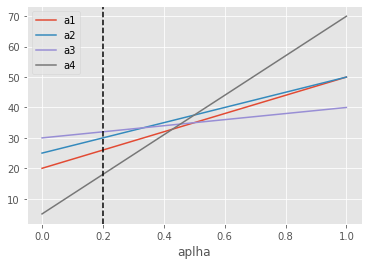

In [ ]:
_alpha = 0.2 #@param {type:"slider", min:0, max:1, step:0.1}

hurwicz_sim = pd.concat(
    [consequence_table.T.max()*_a + consequence_table.T.min()*(1-_a) for _a in [0, 0.5, 1]]
    ,axis=1
).T
hurwicz_sim.index = [0, 0.5, 1]
hurwicz_sim.plot()
plt.xlabel('aplha')
plt.axvline(x=_alpha, color='black', linestyle='--')
plt.show()

#### Minimax regret 基準 (Savage 基準)
- 後悔(regret)の大きさを最大値を最小にする基準
- まずregret $r(a_i, \theta_j)$ を以下の通り定義する
$$
r(a_i, \theta_j) = max_{a_i} [c(a_i, \theta_j) ] - c(a_i, \theta_j)
$$


In [ ]:
# 以下が利得行列
consequence_table.style.bar(align='mid',color=['red', 'green'])

,theta1,theta2,theta3,theta4
a1,50,35,20,40
a2,45,50,35,25
a3,35,35,40,30
a4,45,20,5,70


In [ ]:
# regret matrix
regret_table = consequence_table.max() - consequence_table
regret_table.style.bar(align='mid',color=['green', 'red'])

,theta1,theta2,theta3,theta4
a1,0,15,20,30
a2,5,0,5,45
a3,15,15,0,40
a4,5,30,35,0


In [ ]:
print("各政策オプションの最大regret :\n", regret_table.T.max())
print("Minimax regret 基準 :", regret_table.T.max().idxmin())

各政策オプションの最大regret :
 a1    30
a2    45
a3    40
a4    35
dtype: int64
Minimax regret 基準 : a1


#### Laplace 基準
- 各政策オプションごとの利得について算術平均を計算
- その最大値を採択する
$$
\lambda_{Laplace}(a_i) = \dfrac{1}{\#\Theta} \sum_{j}^{\#\Theta} c(a_i, \theta_j)
$$
$$
a^{Laplace} = argmax_{a_i}\lambda_{Laplace}(a_i)
$$

In [ ]:
print("各政策オプションの平均利得 :\n", consequence_table.T.mean())
print("Laplace 基準 :", consequence_table.T.mean().idxmax())

各政策オプションの平均利得 :
 a1    36.25
a2    38.75
a3    35.00
a4    35.00
dtype: float64
Laplace 基準 : a2


## 不完全状態における意思決定


### 展開型意思決定
- 自然状態の情報（周辺分布）がわかれば、それの期待値をもとに意思決定できるはず


意思決定問題 D={$A, \Theta, c, P(\theta)$}とする。

|  | $\theta_1$ | ... |  $\theta_j$ | ... |  $\theta_{\#\Theta}$ |
| --- |  :---: | :---: | :---:| :---: | :---: |
| $a_1$ |$$c(a_1,\theta_1)$$| ... | $$c(a_1, \theta_j)$$ | ... |$$c(a_1, \theta_{\#\Theta})$$ |
|...  | ... | ... | ... | ... |...|
| $a_i$ |$c(a_i,\theta_1)$| ... | $c(a_i, \theta_j)$ | ... |$c(a_i, \theta_{\#\Theta})$ |
|...  | ... | ... | ... | ... |...|
| $a_{\#A}$ |$c(a_{\#A},\theta_1)$| ... | $c(a_{\#A}, \theta_j)$ | ... |$c(a_{\#A}, \theta_{\#\Theta})$ |

+

|  | $\theta_1$ | ... |  $\theta_j$ | ... |  $\theta_{\#\Theta}$ |
| --- |  :---: | :---: | :---:| :---: | :---: |
| $a_1$ |$$P(\theta_1)$$| ... | $$P(\theta_j)$$ | ... |$$P(\theta_{\#\Theta})$$ |

In [ ]:
consequence_table.style.bar(align='mid',color=['red', 'green'])

,theta1,theta2,theta3,theta4
a1,50,35,20,40
a2,45,50,35,25
a3,35,35,40,30
a4,45,20,5,70


In [ ]:
prob_table = pd.DataFrame(
    {
        "theta1" : [0.4],
        "theta2" : [0.2],
        "theta3" : [0.3],
        "theta4" : [0.1]
    }
)

assert int(prob_table.sum(axis=1).values)  == 1
prob_table

,theta1,theta2,theta3,theta4
0,0.4,0.2,0.3,0.1


In [ ]:
print("各政策オプションの期待値 :\n", consequence_table @ prob_table.T )
print("期待値に基づいた意思決定 :", (consequence_table @ prob_table.T ).idxmax().values[0])

各政策オプションの期待値 :
        0
a1  37.0
a2  41.0
a3  36.0
a4  30.5
期待値に基づいた意思決定 : a2


###  "予測"はどの程度の精度であれば信頼できる意思決定になるのか？
- 以下では、予測モデルの品質はどの程度確保するべきかを議論する
    - つまり、意思決定問題を意思決定問題 D={$A, \Theta, c, P(\theta, f)$}と捉え直す
    - $P(\theta, f)$は自然状態$\theta$と予測値$f$の同時分布である

| | $f_1$ |  $f_2$ | 合計|
| --- |  :---: | :---: |:---: |
|$\theta_{1}$ |$$P(\theta_1, f_1)$$| $$P(\theta_1, f_2)$$| $$P(\theta_1)$$|
|$\theta_{2}$  | $$P(\theta_2, f_1)$$| $$P(\theta_2, f_2)$$ | $$P(\theta_2)$$|
|合計 |$$P( f_1)$$ |$$P( f_2)$$ | 1|


- 以下は馬場（2021）,  Thomoson & Brier (1955)に従いcost/lossモデルで考える
- 以下のようなシチュエーションを考える
    - 望ましい状態$\theta_{good}$の場合、何もしない($=a_{c}$)状態でも、基準利益$T$を得ることができる
    - 望ましい状態$\theta_{good}$で、無駄に政策を行った($=a_{t}$)すると、基準利益$T$からコスト$C$引かれる
    - 望ましくない状態$\theta_{bad}$において、政策の不作為($=a_{c}$)は、基準利益から$L$分の損失が引かれる
    - 望ましくない状態$\theta_{bad}$において、政策の介入($=a_{t}$)によって$L$を解消できる。ただし、介入費用$C$は引かれる

- cost/lossモデルの利得表

| | $\theta_{bad}$ |  $\theta_{good}$ |
| --- |  :---: | :---: |
|$a_{c}$ |$$T-L$$| $$T$$|
|$a_{t}$  | $$T-C$$ | $$T-C$$ |

- cost/lossモデルのスケーリングした利得表
    - Tを引く
    - Lで割る

| | $\theta_{bad}$ |  $\theta_{good}$ |
| --- |  :---: | :---: |
|$a_{c}$ |-1| 0|
|$a_{t}$  | $$-C/L$$ | $$-C/L$$ |    

### 基本方針 : ESVが最大になる選択肢を選ぶ

- このスケーリングした状態におけるESV（Expected Scaled Value）を計算する（馬場, 2021）
- $c'(a_i, \theta_j)$をスケーリング後の利得とするとESVは以下である

$$
  ESV(a_i | P(\theta)) := \sum_j^2 P(\theta_j) * c'(a_i, \theta_j)
$$

- $a_c$, $a_t$のESVをそれぞれ計算すると
$$
    \begin{align}
        ESV(a_c | P(\theta))   &=  \sum_j^2 P(\theta_j) * c'(a_c, \theta_j)   \\
          &= P(\theta_{bad}) * (-1) +   P(\theta_{good}) * (0)\\
         &=-P(\theta_{bad})
    \end{align}
$$

$$
    \begin{align}
        ESV(a_t | P(\theta))   &=  \sum_j^2 P(\theta_j) * c'(a_t, \theta_j)   \\
          &= P(\theta_{bad}) * (-\dfrac{C}{L}) +   P(\theta_{good}) * (-\dfrac{C}{L})\\
         &=-\dfrac{C}{L}
    \end{align}
$$

- つまり、
    - if $\dfrac{C}{L} > P(\theta_{bad}) $ then **chose $a_c$ (何もしない)**
    - else  $\dfrac{C}{L} < P(\theta_{bad}) $ then **chose $a_t$ (政策介入する)**

### $P(\theta)$を$P(\theta, f)$に拡張
- 「予測結果に忠実に従う」意思決定ルールにおけるESV


$$
    \begin{align}
          ESV(a_f | P(\theta, f)) &:= \sum_j^2 \sum_k^2 P(\theta_j, f_k) * c'(a_i, \theta_j)  \\
         &=-P(\theta_{bad}, f_{good})  - P(f_{bad}) *\dfrac{C}{L}
    \end{align}
$$

### 予測$f$を利用すべき条件

#### if $\dfrac{C}{L} > P(\theta_{bad}) $ then **chose $a_c$ (何もしない)**
$$
    \begin{align}
          ESV(a_f | P(\theta, f)) &> ESV(a_c | P(\theta)  \\
         -P(\theta_{bad}, f_{good}) - P(f_{bad})*\dfrac{C}{L}  &> -P(\theta_{bad})  \\
         \dfrac{C}{L}  &< P(\theta_{bad} |f_{bad})
    \end{align}
$$

=> $\dfrac{C}{L}  < P(\theta_{bad} |f_{bad})$の場合、**予測に従って良い**


#### else  $\dfrac{C}{L} < P(\theta_{bad}) $ then **chose $a_t$ (政策介入する)**

$$
    \begin{align}
          ESV(a_f | P(\theta, f)) &> ESV(a_t | P(\theta)  \\
         -P(\theta_{bad}, f_{good}) - P(f_{bad})*\dfrac{C}{L}  &> - \dfrac{C}{L}  \\
         \dfrac{C}{L}  &> P(\theta_{bad}| f_{good})
    \end{align}
$$
=> $\dfrac{C}{L}  > P(\theta_{bad}| f_{good})$の場合、**予測に従って良い**

#### [架空事例]
- 失業給付事務を対応するとする
- t期の情報をもとに、t+1期の失業保険の予算を決めるものとする
- 政策オプション：今期と同額とすべきか、増額とすべきか（$a_c$ : 継続、 $a_t$ : 予算増額）
- 状態 : t+1期に失業申請が増えるか $= \theta_{bad}$, それ以外 $= \theta_{good}$
    - なお、単純化のために、失業申請が減ることは特に考慮しない（予算が余った場合、繰り越せるとする）
    - また、これも単純化のために、損失額は、失業申請増加の量にかかわらず一定とする

In [ ]:
# @title 利得行列を作成
T = 15  # 社会的効用
C = 10  # 予算増額分の直接費用
L = 20  # 予算不足による社会的（派生）コスト
print( "C/L : " , C/L )

cost_loss_profit = pd.DataFrame(
    {
        "bad" : [ T-L, T-C ],
        "good" : [ T, T-C ],
    }
    ,index = ["a_c", "a_t"]
)
cost_loss_profit

C/L :  0.5


,bad,good
a_c,-5,15
a_t,5,5


In [ ]:
# @title スケーリングした利得行列
cost_loss_profit = (cost_loss_profit  - T) / L
cost_loss_profit

,bad,good
a_c,-1.0,0.0
a_t,-0.5,-0.5


In [ ]:
!pip install -q orbit-ml

In [ ]:
#@title 米国失業給付申請データをダウンロード { display-mode: "form" }
from orbit.utils.dataset import load_iclaims
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
# 2010年1月から2018年6月までの米国の失業給付の週次初回請求件数と、それに関連するいくつかのgoogleのトレンドクエリ（unemploy、filling、job）を含むデータセット

# log-transformed data
state_df = load_iclaims()

X_cols = [
    'trend.unemploy', 'trend.filling', 'trend.job',
]
y_col = "event"

state_df["month"] = state_df["week"].dt.to_period("M").dt.to_timestamp()
state_df = state_df.groupby("month").mean()[["claims"] +X_cols].reset_index()
state_df["event"] = np.where(
    state_df.shift(-1)["claims"] > state_df["claims"], 1, 0
)
state_df = state_df.dropna()
# state_df = pd.concat(
#     [
#         state_df,
#         pd.get_dummies(state_df['month'].dt.month, drop_first=True, prefix="month")
#     ]
#     ,axis = 1
# )

In [ ]:
event_p = (state_df.query("month < '2018-1-01'").groupby("event").count()["month"] / len(state_df.query("month < '2018-1-01'")))
event_p.index = ["good", "bad"]
print("周辺確率 P( theta_bad ) :" , event_p["bad"])

print("周辺確率しか見ない場合：")
if C/L >= event_p["bad"]:
    print("a_c : 何もしないがよい")
else:
    print("a_t : 増額！")

周辺確率 P( theta_bad ) : 0.5729166666666666
周辺確率しか見ない場合：
a_t : 増額！


In [ ]:
#@title (t+1期の増減予測できそうでは？)
# train-test split
train_df = state_df.query("month < '2014-01-01'")
valid_df = state_df.query("'2014-01-01' <= month < '2016-8-01'")
test_df = state_df.query("'2016-08-01' <= month")


In [ ]:
lr = LogisticRegression()
lr.fit(train_df[X_cols], train_df[y_col])

pred_valid = lr.predict(valid_df[X_cols])

confusion_table= pd.DataFrame(
    confusion_matrix(y_true=valid_df[y_col], y_pred=pred_valid)
)
confusion_table.index = ["actual_good", "actual_bad"]
confusion_table.columns = ["pred_good", "pred_bad"]
confusion_table

,pred_good,pred_bad
actual_good,7,7
actual_bad,3,14


ここで、本予測の利用条件を調べる :  $\dfrac{C}{L}  > P(\theta_{bad}| f_{good})$

In [ ]:
print("C/T :", C/L)
print(
    "P(theta_bad | f_good) : "
    , confusion_table.loc["actual_bad", "pred_good"] / confusion_table["pred_good"].sum()
)

C/T : 0.5
P(theta_bad | f_good) :  0.3


##### 本当に予測の効果があったか確かめてみる

In [ ]:
#@title 再掲 { display-mode: "form" }

T = 15  # 社会的効用
C = 10  # 予算増額分の直接費用
L = 20  # 予算不足による社会的（派生）コスト

pd.DataFrame(
    {
        "bad" : [ T-L, T-C ],
        "good" : [ T, T-C ],
    }
    ,index = ["a_c", "a_t"]
)

,bad,good
a_c,-5,15
a_t,5,5


<AxesSubplot: xlabel='month'>

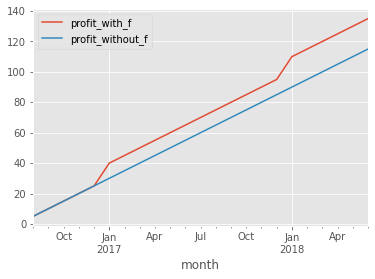

In [ ]:
#@title テストデータで意思決定の利益を比較 { display-mode: "form" }
test_df = test_df .assign(
    pred = lr.predict(test_df[X_cols])
)

# 予測利益
test_df["f_profit"] = np.where(
    (test_df["event"] > 0) & (test_df["pred"] > 0), T-C, 0
)
test_df["f_profit"] = np.where(
    (test_df["event"] < 1) & (test_df["pred"] > 0), T-C, test_df["f_profit"]
)
test_df["f_profit"] = np.where(
    (test_df["event"] > 0) & (test_df["pred"] < 1), T-L, test_df["f_profit"]
)
test_df["f_profit"] = np.where(
    (test_df["event"] < 1) & (test_df["pred"] < 1), T, test_df["f_profit"]
)

# 周辺確率のみの利益
test_df["n_profit"] = 5

test_df.assign(
    profit_with_f = test_df["f_profit"].cumsum(),
    profit_without_f = test_df["n_profit"].cumsum(),
).set_index("month")[["profit_with_f", "profit_without_f"]].plot()

#### [余談]　本当はこのデータセットはもっと予測は簡単

<AxesSubplot: xlabel='month'>

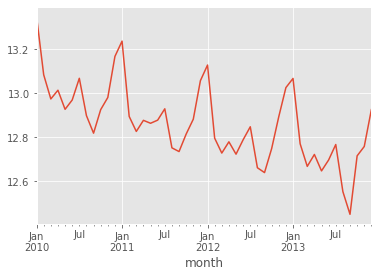

In [ ]:
train_df.set_index("month")["claims"].plot()

In [ ]:
#@title import orbit pkg { display-mode: "form" }
from orbit.utils.dataset import load_iclaims
from orbit.models import DLT
from orbit.diagnostics.plot import plot_predicted_data

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#@title 米国失業給付申請データをダウンロード { display-mode: "form" }
# 2010年1月から2018年6月までの米国の失業給付の週次初回請求件数と、それに関連するいくつかのgoogleのトレンドクエリ（unemploy、filling、job）を含むデータセット

# log-transformed data
state_df = load_iclaims()

# state_df["month"] = state_df["week"].dt.to_period("M").dt.to_timestamp()
# state_df = state_df.groupby("month").mean()[['claims', 'trend.unemploy', 'trend.filling', 'trend.job']].reset_index()
# train-test split
train_df = state_df.query("week < '2017-01-01'")
test_df = state_df.query("'2018-01-01' > week >= '2017-01-01'")

In [ ]:
dlt = DLT(
  response_col='claims', date_col='week',
  regressor_col=['trend.unemploy', 'trend.filling', 'trend.job'],
  seasonality=52,
  prediction_percentiles=[5, 95]
)
dlt.fit(df=train_df)

# outcomes data frame
predicted_df = dlt.predict(df=test_df)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


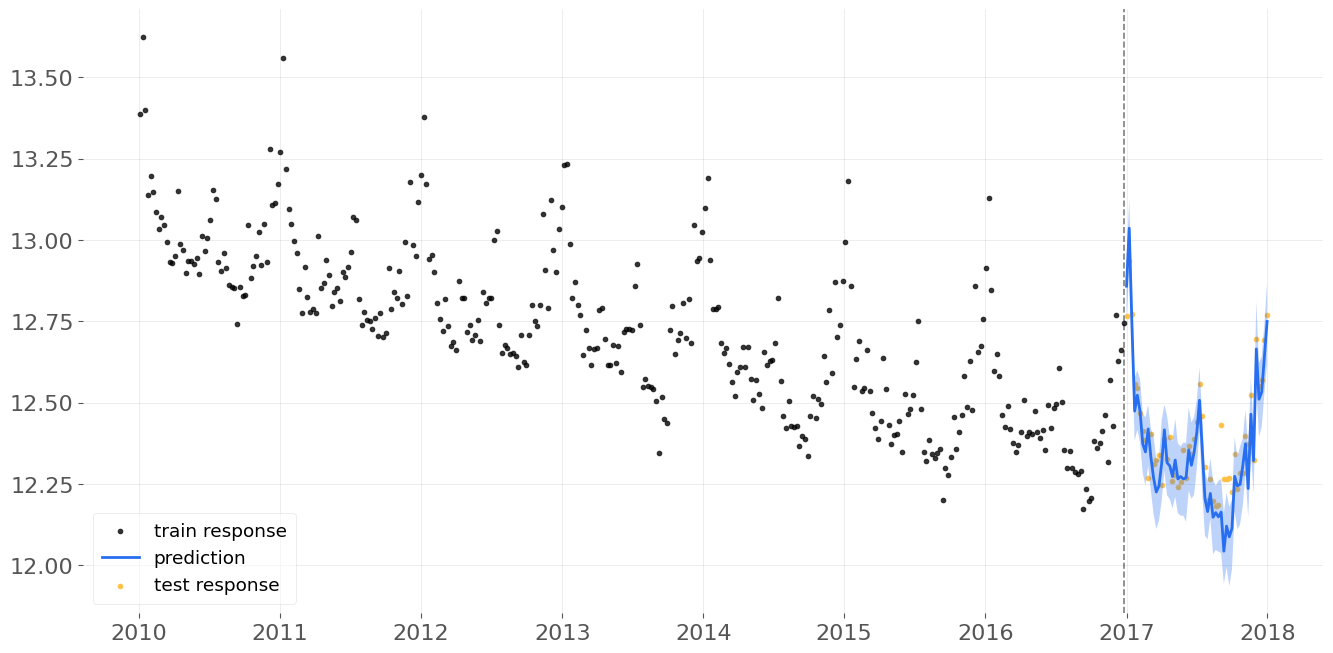

<AxesSubplot: >

In [ ]:
plot_predicted_data(
  training_actual_df=train_df, predicted_df=predicted_df,
  date_col=dlt.date_col, actual_col=dlt.response_col,
  test_actual_df=test_df
)


### 標準型意思決定
- ベイズ型意思決定
- 周辺分布は事前分布として



- ベイズの定理を復習する
- $f$はなんらかの検査とする
$$
    \begin{align}
          P(\theta| f_k) =\dfrac{P(\theta) * P(f_k | \theta)}{P(f_k)}  \\
    \end{align}
$$
- これを使って、条件付き期待値額$EMV(a_i | P(\theta| f_k))$ を最大化するaを選べば良い
$$
EMV(a_i | P(\theta| f_k)) = \sum_{j=1}^{\# \Theta} P(\theta_j| f_k) * c(a_i, \theta_j)
$$

#### さんぷる
- 利得行列

| | 継続 $a_1$ |  再検査 $a_2$ | 中断 $a_3$|
| --- |  :---: | :---: |:---: |
|効果あり$\theta_{1}$ |10| 6| -1|
|効果なし$\theta_{2}$  | -12| -5 | -1|

- 検査$f$の精度

| | 検査 - 効果なし$f_1$ |  検査 - 効果あり$f_2$ | 合計|
| --- |  :---: | :---: |:---: |
|$\theta_{1}$ |$$P(f_1|\theta_1)=0.8$$ | 0.2| 1|
|$\theta_{2}$ | 0.1| 0.9 | 1|

In [ ]:
payoff_table = pd.DataFrame(
    {
        "launch" : [ 10,  -12],
        "recheck" : [ 6,  -5 ],
        "withdrawal" : [ -1,  -1 ],
    }
    ,index = ["effect", "no_effect"]
)
payoff_table

,launch,recheck,withdrawal
effect,10,6,-1
no_effect,-12,-5,-1


In [ ]:
f_state = pd.DataFrame(
    {
        "pred_effect" : [ 0.8, 0.1 ],
        "pred_no_effect" : [ 0.2,  0.9 ],
    }
    ,index = ["effect", "no_effect"]
)
f_state

,pred_effect,pred_no_effect
effect,0.8,0.2
no_effect,0.1,0.9


- このとき、検査$f$で「効果あり」と判定を得た
- 政策担当者は事前確率として $P(効果あり)=0.6$と試算している
- この際の理にかなった行動は、
    - ベイズ更新
    - これをベースにEMVを最大にする判断を行う

$$ $$

In [ ]:
pre_info_effect = 0.6 #@param {type:"slider", min:0, max:1, step:0.1}

pre_info = pd.Series(
    {
        "effect" : pre_info_effect,
        "no_effect" : 1 - pre_info_effect
    }
)

pre_info

effect       0.6
no_effect    0.4
dtype: float64

In [ ]:
joint_state = f_state.mul(pre_info, axis=0)  # p(theta) * p(f | theta)
marginal_state = joint_state.sum(axis=0)   # p(f)を計算
conditional_state = joint_state.div(marginal_state, axis=1) # p(theta | theta)

conditional_state

,pred_effect,pred_no_effect
effect,0.923077,0.25
no_effect,0.076923,0.75


In [ ]:
decision_table = payoff_table.T @ conditional_state
decision_table.style.bar(align='mid',color=['red', 'green'])

,pred_effect,pred_no_effect
launch,8.307692,-6.500000
recheck,5.153846,-2.250000
withdrawal,-1.000000,-1.000000
